# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Focuses on showing example expressions and aggregrate representations of emotion categories.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
from utils.image_processing import (
    display_random_images_from_df,
    preprocess_image,
    apply_pca,
    compute_average_face,
    log_pca_results
)

In [6]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [7]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,black
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,slategray


In [8]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
print_json(common_dicts)

{
    "usage_dict": {
        "Training": "Training",
        "PublicTest": "Testing",
        "PrivateTest": "Testing"
    },
    "emo_dict": {
        "0": "Angry",
        "1": "Disgust",
        "2": "Fear",
        "3": "Happy",
        "4": "Sad",
        "5": "Surprise",
        "6": "Neutral"
    },
    "plotly_styles": {
        "Training": {
            "color": {
                "Angry": "red",
                "Disgust": "olive",
                "Fear": "black",
                "Happy": "gold",
                "Sad": "blue",
                "Surprise": "darkviolet",
                "Neutral": "slategray"
            },
            "opacity": 1.0,
            "line": {
                "color": "black",
                "width": 0.3
            },
            "pattern": {
                "shape": ""
            }
        },
        "Testing": {
            "color": {
                "Angry": "red",
                "Disgust": "olive",
                "Fear": "black",
           

In [9]:
color_dict = common_dicts['plotly_styles']['Training']['color']

## Display Example Images from Each Category

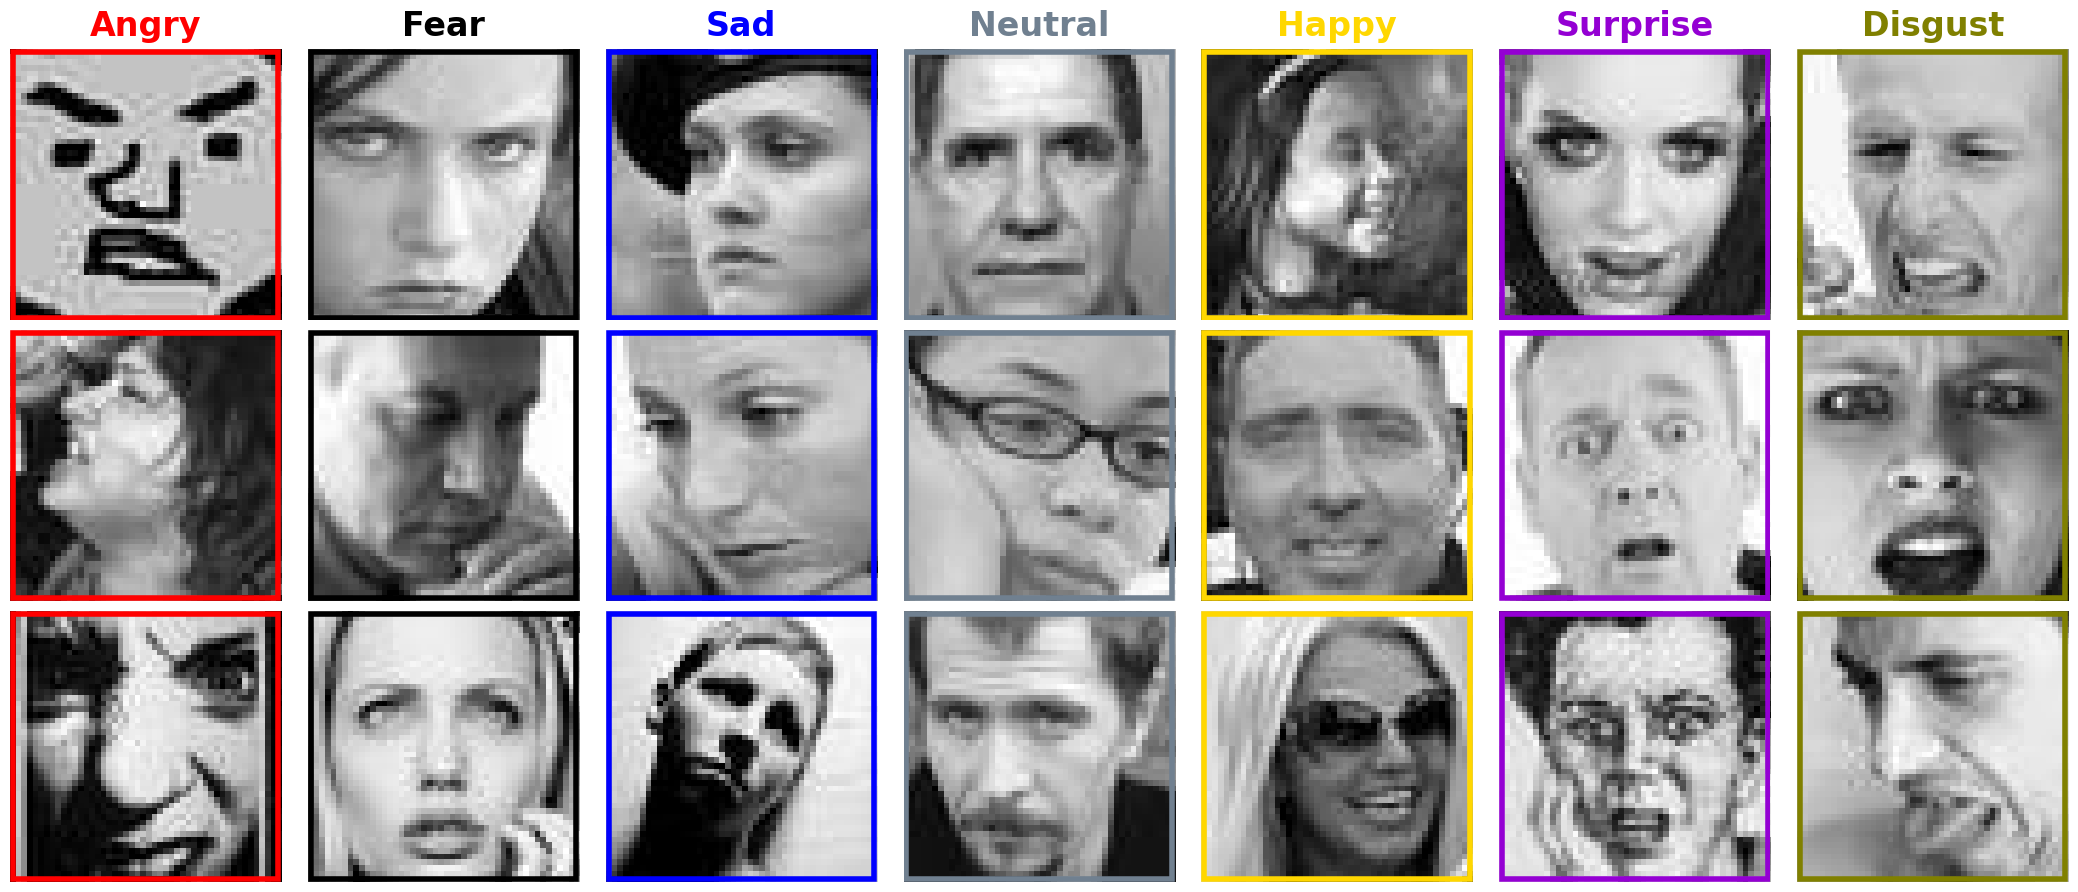

In [11]:
display_random_images_from_df(fer2013, n_rows=3)

## Unsupervised Learning Analyses

In [13]:
# Example: datasets/emotions/happy, datasets/emotions/sad, etc.
emotions = fer2013['emotion'].tolist()

In [14]:
# Dictionary to hold images by category
images_by_category = {emotion: [] for emotion in emotions}

In [15]:
# Group images by emotion
emotion_groups = fer2013.groupby('emotion')

# Iterate over each emotion category efficiently
for emotion, group in emotion_groups:
    # Preprocess each image using a list comprehension
    images = [preprocess_image(cv2.imread(img_path)) for img_path in group['img_path']]
    
    # Store preprocessed images for this emotion
    images_by_category[emotion] = images

Processing category: Angry
Logged PCA results for emotion category: Angry


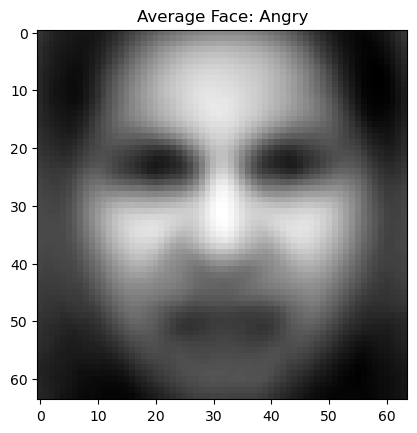

Processing category: Fear
Logged PCA results for emotion category: Fear


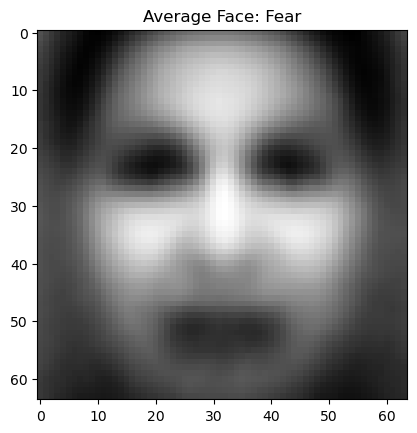

Processing category: Sad
Logged PCA results for emotion category: Sad


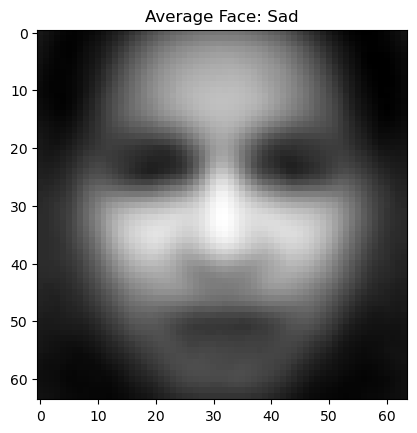

Processing category: Neutral
Logged PCA results for emotion category: Neutral


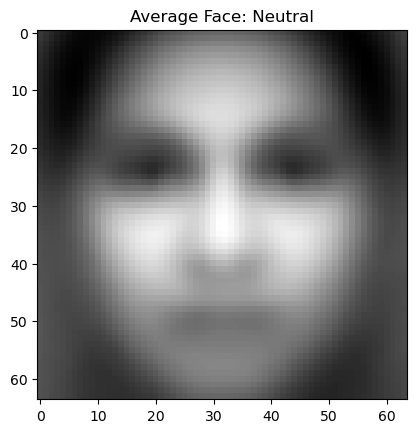

Processing category: Happy
Logged PCA results for emotion category: Happy


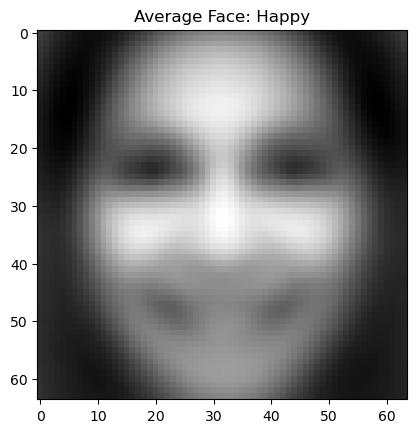

Processing category: Surprise
Logged PCA results for emotion category: Surprise


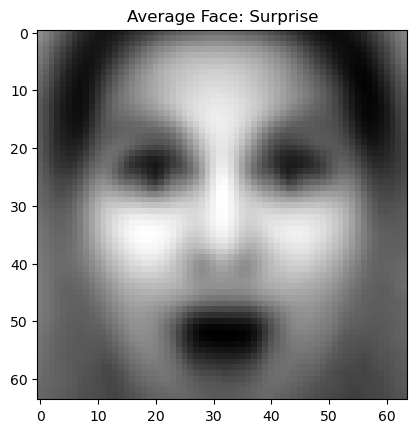

Processing category: Disgust
Logged PCA results for emotion category: Disgust


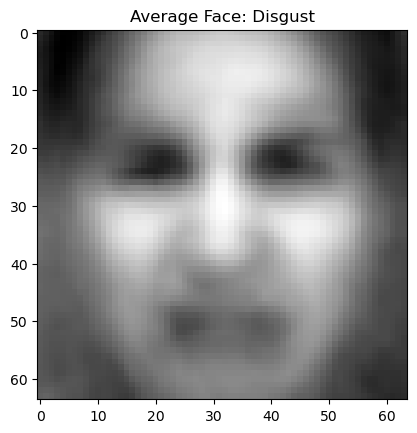

In [16]:
# Apply PCA and compute the average face for each category
n_components = 50
for emotion, images in images_by_category.items():
    print(f"Processing category: {emotion}")
    
    # Apply PCA
    transformed_images, pca = apply_pca(images, n_components)
    
    # Compute the average face
    average_face = compute_average_face(images)
    
    # Log the PCA and average face results with MLflow
    log_pca_results(pca, average_face, emotion)
    
    # Display the average face
    plt.imshow(average_face, cmap='gray')
    plt.title(f"Average Face: {emotion}")
    plt.show()

In [17]:
# !mlflow ui

[2024-10-08 12:30:46 -0600] [2890] [INFO] Starting gunicorn 23.0.0
[2024-10-08 12:30:46 -0600] [2890] [INFO] Listening at: http://127.0.0.1:5000 (2890)
[2024-10-08 12:30:46 -0600] [2890] [INFO] Using worker: sync
[2024-10-08 12:30:46 -0600] [2891] [INFO] Booting worker with pid: 2891
[2024-10-08 12:30:46 -0600] [2892] [INFO] Booting worker with pid: 2892
[2024-10-08 12:30:46 -0600] [2893] [INFO] Booting worker with pid: 2893
[2024-10-08 12:30:46 -0600] [2894] [INFO] Booting worker with pid: 2894
^C
[2024-10-08 12:31:56 -0600] [2890] [INFO] Handling signal: int
[2024-10-08 12:31:56 -0600] [2894] [INFO] Worker exiting (pid: 2894)
[2024-10-08 12:31:56 -0600] [2893] [INFO] Worker exiting (pid: 2893)
[2024-10-08 12:31:56 -0600] [2892] [INFO] Worker exiting (pid: 2892)
[2024-10-08 12:31:56 -0600] [2891] [INFO] Worker exiting (pid: 2891)


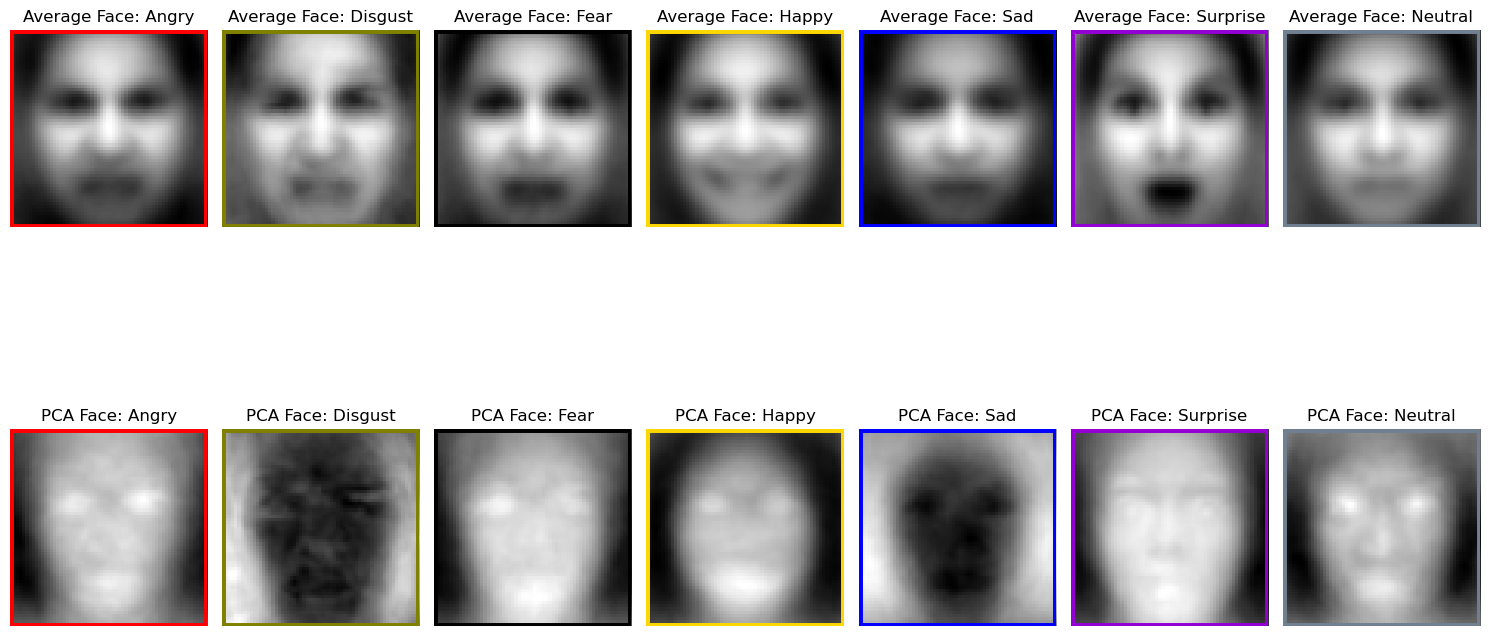

In [24]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

# # Define emotion-to-color mapping
# emotion_colors = {
#     'happy': 'yellow',
#     'sad': 'blue',
#     'angry': 'red',
#     'surprised': 'green'
# }

# Directories where images and PCA arrays are stored
average_face_dir = 'imgs/facial_features'
pca_array_dir = 'data/pca_arrays'

# Emotions you're working with
emotions = common_dicts['emo_dict'].values()

# Create a figure with subplots
fig, axes = plt.subplots(2, len(emotions), figsize=(15, 10))  # 2 rows for PCA and average faces

# Iterate over emotions and create subplots for PCA and average faces
for idx, emotion in enumerate(emotions):
    
    # Load the average face image
    avg_face_path = os.path.join(average_face_dir, f"average_face_{emotion}.png")
    avg_face_img = cv2.imread(avg_face_path, cv2.IMREAD_GRAYSCALE)
    
    # Load the PCA components or a reconstructed image from PCA if you have one
    pca_components_path = os.path.join(pca_array_dir, f"pca_components_{emotion}.npy")
    pca_components = np.load(pca_components_path)  # Loaded PCA array (adjust how you visualize this)
    
    # ------------------------ Plotting Average Face ------------------------
    ax_avg = axes[0, idx]
    ax_avg.imshow(avg_face_img, cmap='gray')
    ax_avg.set_title(f'Average Face: {emotion}')
    ax_avg.axis('off')  # Hide axis for clean display
    
    # Add a colored border frame around the average face plot
    rect_avg = Rectangle((0, 0), 1, 1, transform=ax_avg.transAxes,
                         linewidth=5, edgecolor=color_dict[emotion], facecolor='none')
    ax_avg.add_patch(rect_avg)

    # ------------------------ Plotting PCA Image ------------------------
    ax_pca = axes[1, idx]
    
    # Assuming you have a way to visualize PCA components or a reconstructed face
    # For illustration, let's plot the first principal component reshaped to image size
    pca_img = pca_components[0].reshape(avg_face_img.shape)  # Reshape based on your image dimensions
    ax_pca.imshow(pca_img, cmap='gray')
    ax_pca.set_title(f'PCA Face: {emotion}')
    ax_pca.axis('off')

    # Add a colored border frame around the PCA face plot
    rect_pca = Rectangle((0, 0), 1, 1, transform=ax_pca.transAxes,
                         linewidth=5, edgecolor=color_dict[emotion], facecolor='none')
    ax_pca.add_patch(rect_pca)

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
# Create an additional subplot to combine all average faces
ax_all = fig.add_subplot(2, len(emotions) + 1, len(emotions) * 2)  # One extra column for comparison

# Combine all average faces into one composite image
all_avg_faces = np.mean([cv2.imread(os.path.join(average_face_dir, f"average_face_{emotion}.png"),
                                    cv2.IMREAD_GRAYSCALE) for emotion in emotions], axis=0)
ax_all.imshow(all_avg_faces, cmap='gray')
ax_all.set_title('All Average Faces')
ax_all.axis('off')

# You can similarly do this for PCA faces if needed
plt.show()